In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def histogram_equalization(image_path):
    # 讀取圖像
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # 計算原始直方圖
    hist, bins = np.histogram(img.flatten(), 256, [0,256])
    
    # 計算累積分布函數（CDF）
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    
    # 忽略CDF中為0的部分
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    
    # 均衡化
    img_eq = cdf[img]
    
    # 計算均衡化後的直方圖
    hist_eq, bins_eq = np.histogram(img_eq.flatten(), 256, [0,256])
    
    # 顯示結果
    plt.figure(figsize=(12,6))
    
    plt.subplot(2,2,1)
    plt.imshow(img, cmap='gray')
    plt.title('original image')
    plt.axis('off')
    
    plt.subplot(2,2,2)
    plt.plot(hist, color='black')
    plt.title('original histogram')
    plt.xlim([0,256])
    
    plt.subplot(2,2,3)
    plt.imshow(img_eq, cmap='gray')
    plt.title('equalized image')
    plt.axis('off')
    
    plt.subplot(2,2,4)
    plt.plot(hist_eq, color='black')
    plt.title('equalized histogram')
    plt.xlim([0,256])
    
    plt.tight_layout()
    plt.show()


In [18]:
# 測試範例
image_paths = [
    r"C:\Users\user\ncku\Assignment 2 Image Enhancement\image\Histogram equalization_Test1.bmp",
    r"C:\Users\user\ncku\Assignment 2 Image Enhancement\image\Histogram equalization_Test2.bmp"
]

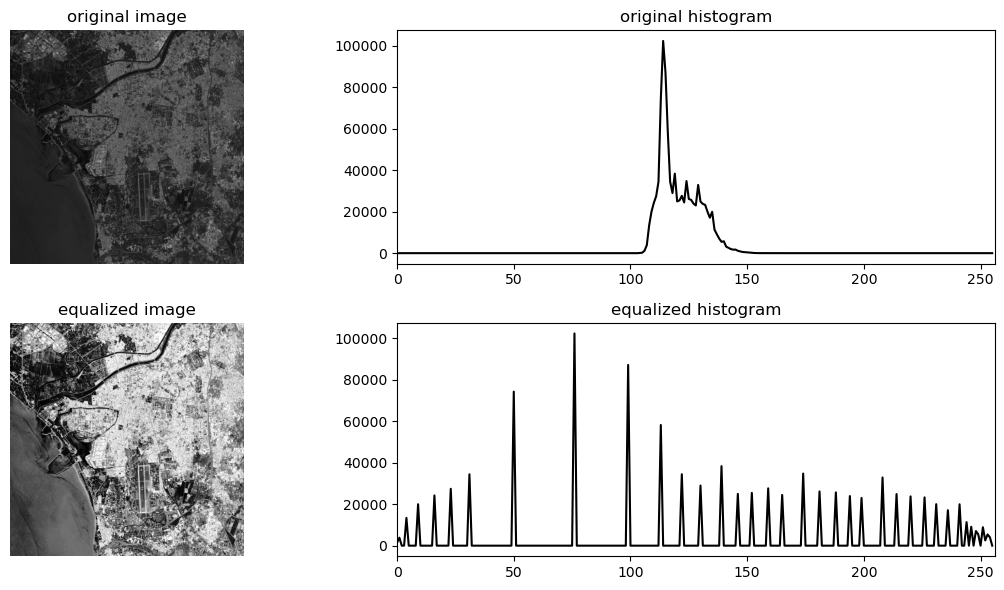

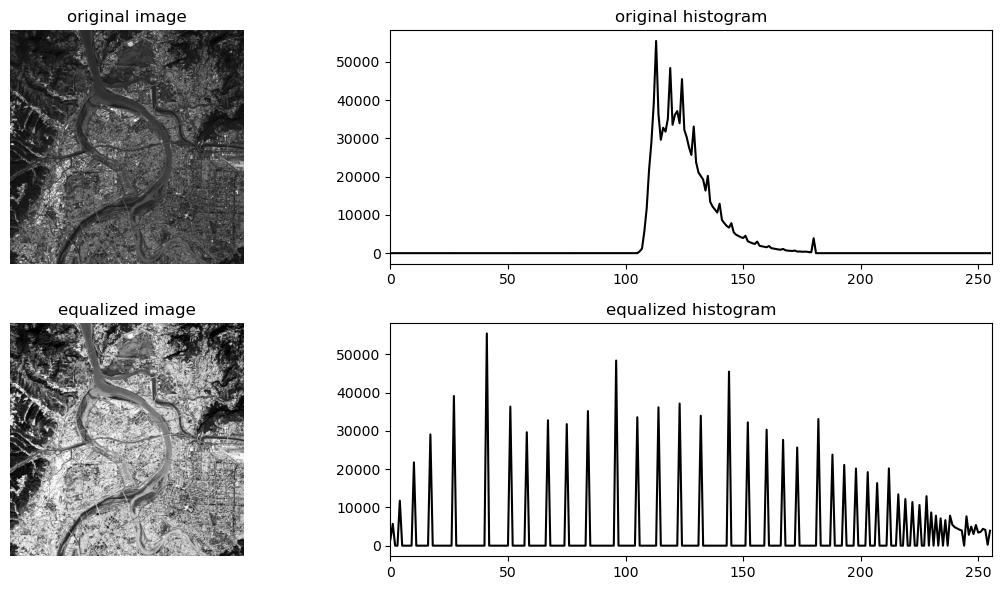

In [19]:
for path in image_paths:
    histogram_equalization(path)

In [20]:
def histogram_matching(source_path, target_path):
    """
    實現直方圖匹配並顯示結果。
    """  
    # 讀取原始圖像和目標圖像（灰階）
    source = cv2.imread(source_path, cv2.IMREAD_GRAYSCALE)
    target = cv2.imread(target_path, cv2.IMREAD_GRAYSCALE)

    # 計算原始圖像的直方圖和CDF
    src_hist, bins = np.histogram(source.flatten(), 256, [0,256])
    src_cdf = src_hist.cumsum()
    src_cdf_normalized = src_cdf / src_cdf.max()
    
    # 計算目標圖像的直方圖和CDF
    tgt_hist, bins = np.histogram(target.flatten(), 256, [0,256])
    tgt_cdf = tgt_hist.cumsum()
    tgt_cdf_normalized = tgt_cdf / tgt_cdf.max()
    
    # 建立映射函數
    mapping = np.zeros(256, dtype=np.uint8)
    for src_pixel in range(256):
        # 找到目標CDF中最接近源CDF的像素值
        diff = np.abs(tgt_cdf_normalized - src_cdf_normalized[src_pixel])
        mapping[src_pixel] = np.argmin(diff)
    
    # 應用映射函數
    matched = mapping[source]
    
    # 計算匹配後的直方圖
    matched_hist, bins = np.histogram(matched.flatten(), 256, [0,256])
    
    # 顯示結果
    plt.figure(figsize=(12,6))
    
    plt.subplot(2,2,1)
    plt.imshow(source, cmap='gray')
    plt.title('source image')
    plt.axis('off')
    
    plt.subplot(2,2,2)
    plt.plot(src_hist, color='black')
    plt.title('source histogram')
    plt.xlim([0,256])
    
    plt.subplot(2,2,3)
    plt.imshow(matched, cmap='gray')
    plt.title('match image')
    plt.axis('off')
    
    plt.subplot(2,2,4)
    plt.plot(matched_hist, color='black')
    plt.title('match histogram')
    plt.xlim([0,256])
    
    plt.tight_layout()
    plt.show()

In [21]:
# 測試範例1
source_image_path_1 = r"C:\Users\user\ncku\Assignment 2 Image Enhancement\image\Histogram Matching Test1\Taipei_1000x1000_02_LowConstrast.bmp"
target_image_path_1 = r"C:\Users\user\ncku\Assignment 2 Image Enhancement\image\Histogram Matching Test1\Taipei_1000x1000_01.bmp"
# 測試範例2
source_image_path_2 = r"C:\Users\user\ncku\Assignment 2 Image Enhancement\image\Histogram Matching Test2\Tainan_1000x1000_01_LowContrast.bmp"
target_image_path_2 = r"C:\Users\user\ncku\Assignment 2 Image Enhancement\image\Histogram Matching Test2\Tainan_1000x1000_02.bmp"


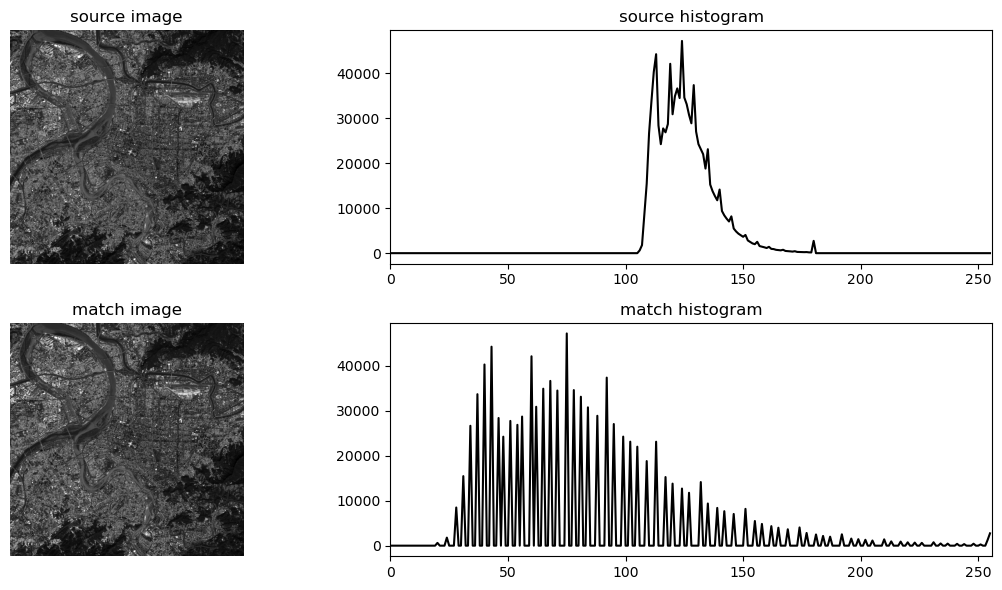

In [22]:
histogram_matching(source_image_path_1, target_image_path_1)

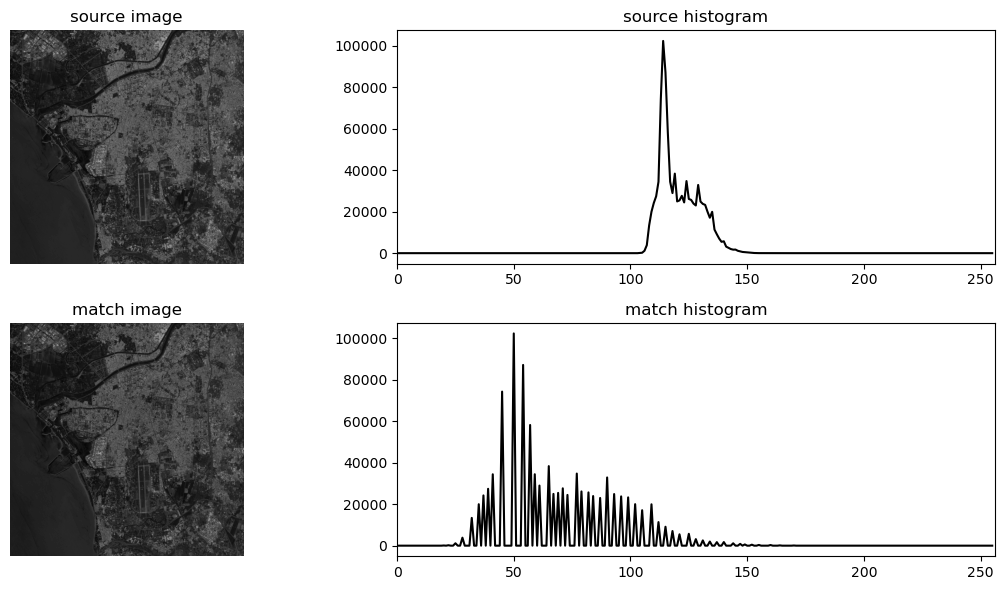

In [23]:
histogram_matching(source_image_path_2, target_image_path_2)